In [2]:
import os
import pickle
import networkx as nx
import fa2

from datautils import (
    datautils,
    stats,
)
from graph import graph
from style import style

In [3]:
# Aleks: Loader jest na tyle szybki, ze nie ma sensu tworzyc pickle z dataframem, ktory sam w sobie zajmuje ~80Mb

# if os.path.exists('data/data_all.pickle'):
#     with open('data/data_all.pickle', "rb") as rbfile:
#         data = pickle.load(rbfile)
# else:
loader = datautils.Loader()
loader.load("data/characters/")
data = loader.to_dataframe()
loader.drop()
    # with open('data/data_all.pickle', "wb") as wbfile:
    #     pickle.dump(data, wbfile)

All nodes:
Number of nodes: 22967
Number of links: 91910


Connected components:
Number of nodes: 19078
Number of links: 86559
==================== Universe stats ====================

In degree: {'mean': 4.0018287107589146, 'median': 1, 'mode': 1, 'min': 0, 'max': 915}
Out degree: {'mean': 4.0018287107589146, 'median': 2, 'mode': 1, 'min': 0, 'max': 390}
Calculating best minimal value for power law fit
In degree slope: 2.55


(<Figure size 1200x800 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'In-degree'}, xlabel='Degree', ylabel='Count (log scale)'>,
        <AxesSubplot: title={'center': 'Out-degree'}, xlabel='Degree'>],
       dtype=object))

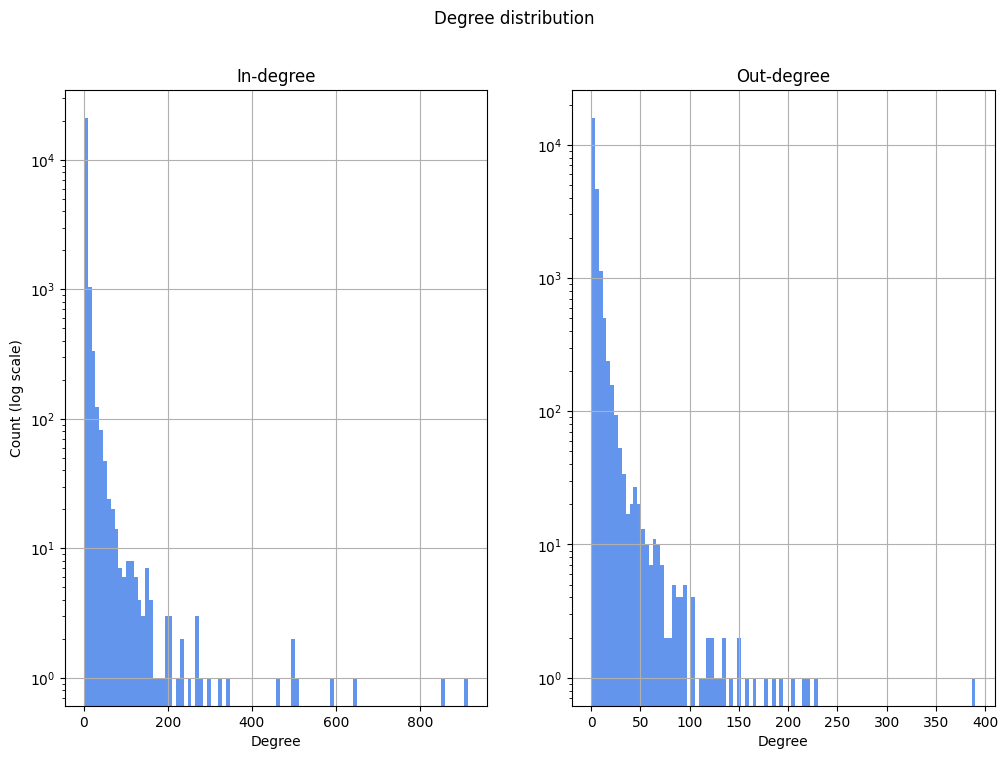

In [4]:
# Aleks: Zamiast 3 razy uzywac grap/universe.edgelist
# Mozna utworzyc stala ktora zawiera ta wartosc, tzn. UNIVERSE_EDGELIST_PATH = graph/universe.edgelist
# I wtedy w wypadku zaminy sciezki, wystarczy to zrobic w jednym miejscu a nie 3
UNIVERSE_EDGELIST_PATH = "graph/universe.edgelist"

if os.path.exists(UNIVERSE_EDGELIST_PATH):
    Universe = nx.read_edgelist(UNIVERSE_EDGELIST_PATH, create_using=nx.DiGraph)
else:
    Universe = graph.create_directed_graph(data)
    # save graph as an edgelist
    nx.write_edgelist(Universe,UNIVERSE_EDGELIST_PATH)

print("All nodes:")
print(f"Number of nodes: {len(Universe.nodes)}")
print(f"Number of links: {len(Universe.edges)}")
print("\n")

Universe_CC = graph.connected_components(Universe)
print("Connected components:")
print(f"Number of nodes: {len(Universe_CC.nodes)}")
print(f"Number of links: {len(Universe_CC.edges)}")

# calculater degree distributions
style.print_header("Universe stats")
in_stats = stats.calc_stats(Universe.in_degree())
out_stats = stats.calc_stats(Universe.out_degree())
print(f"In degree: {in_stats}")
print(f"Out degree: {out_stats}")

print(f"In degree slope: {graph.power_law_fit(Universe):.2f}")    

graph.plot_degree_distribution(Universe, scale = 'log')

In [12]:
# Aleks: Ta funkcja robi za duzo. Albo zapisz albo plot. Bo w tym momencie jest troche jak thermomix: pomiesza, pokroi i ugotuje.

# def plot_fa2_graph(graph, edge_color, node_color, title, positions_save_name, positions = False):
#     """
#     Calculate fa2 positions if not present; Display the universe; Save the positions for later use
#     """
#     if not positions:
#         positions = fa2.ForceAtlas2().forceatlas2_networkx_layout(graph, pos=None, iterations=2000)
#     # save to pickle for later use
#     with open(positions_save_name, "wb") as wbfile:
#         pickle.dump(positions, wbfile)

#     node_size = [graph.degree(node)//3 for node in graph.nodes]
#     fig, ax = plt.subplots(1, 1, figsize=(15, 8))
#     nx.draw_networkx_nodes(graph, positions, node_size=node_size, node_color= node_color, alpha=0.85, ax=ax)
#     nx.draw_networkx_edges(graph, positions, edge_color=edge_color, alpha=0.1, ax=ax)
#     ax.set_title(title, size=24)
#     ax.axis("off")
#     plt.show()
#     plt.tight_layout()



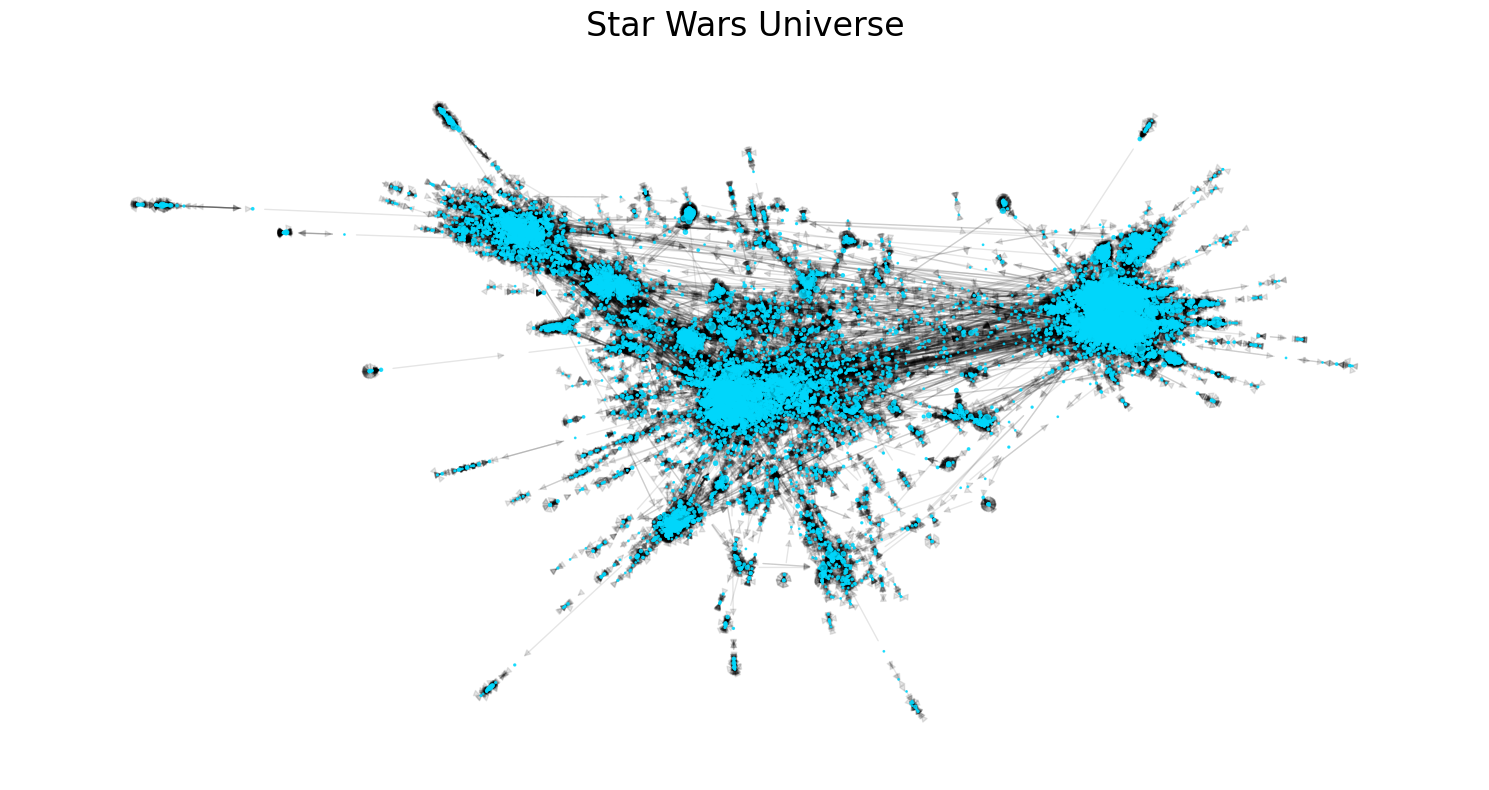

In [6]:
# Aleks: Przenioslem do style/style.py
# BLUE = "#00d7fc"
# GRAY = "#000000"
FA_POSITIONS = "data/positions.pickle"

# load pickle with pre-calculated positions if present
if os.path.exists(FA_POSITIONS):
    with open(FA_POSITIONS, "rb") as rbfile:
        positions = pickle.load(rbfile)
# else:
#     positions = None
# plot_fa2_graph(Universe_CC, GRAY, BLUE, "Star Wars Universe", FA_POSITIONS, positions = positions)
else:
    positions = fa2.ForceAtlas2().forceatlas2_networkx_layout(Universe_CC, pos=None, iterations=2000)
    # save to pickle for later use
    with open(FA_POSITIONS, "wb") as wbfile:
        pickle.dump(positions, wbfile)

graph.plot_graph_with_positons(Universe_CC, positions, "Star Wars Universe")